<a href="https://colab.research.google.com/github/JAYESHtheBOSS/projects/blob/main/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# importing deep learning libraries

from keras.models import Sequential
from keras.layers import Flatten,Dropout,Dense,Input,GlobalAveragePooling2D,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
#Displaying images

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle.json': b'{"username":"jayeshsonawane","key":"d668fd98ce3dba5b1151e3dca3aa13b4"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 99% 119M/121M [00:06<00:00, 24.8MB/s]
100% 121M/121M [00:06<00:00, 20.7MB/s]


In [ ]:
!unzip face-expression-recognition-dataset.zip 

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
picture_size = 48
folder_path = '/content/images'

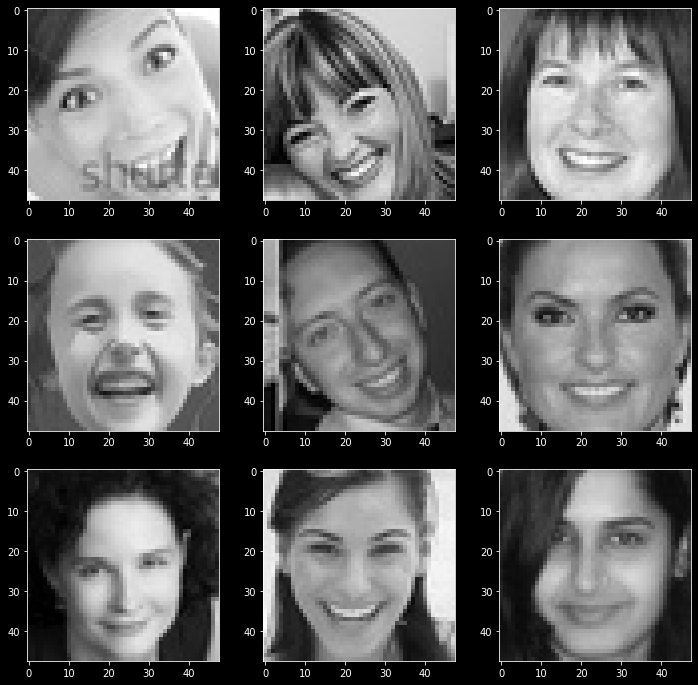

In [ ]:
expression = 'happy'
plt.style.use('dark_background')
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/train/"+expression+"/"+ os.listdir(folder_path+"/train/"+expression)[i],target_size=(picture_size,picture_size))
    plt.imshow(img)
plt.show()              

In [ ]:
#Splitting into Train and test data
Batch_size = 128

datagen_train = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + "/train",
                                                 target_size = (picture_size,picture_size),
                                                 color_mode = 'grayscale',
                                                 batch_size = Batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle = True)
test_set = datagen_test.flow_from_directory(folder_path + "/validation",
                                                 target_size = (picture_size,picture_size),
                                                 color_mode = 'grayscale',
                                                 batch_size = Batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle = True)
                                                               

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
#Model Building
no_of_classes = 7
epochs = 48

model = Sequential()
#1st CNN layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation = 'softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Fitting the model with train and validation data

from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc',verbose=1,save_best_only=True,mode='max')

early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks_list=[checkpoint,early_stopping,reduce_learningrate]

In [ ]:
history = model.fit_generator(generator=train_set,
                              steps_per_epoch=train_set.n//train_set.batch_size,
                              epochs=epochs,
                              validation_data=test_set,
                              validation_steps = test_set.n//test_set.batch_size,
                              callbacks=callbacks_list)

Epoch 1/48


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


225/225 [==============================] - ETA: 0s - loss: 2.0259 - accuracy: 0.2298

225/225 [==============================] - 23s 58ms/step - loss: 2.0259 - accuracy: 0.2298 - val_loss: 1.7429 - val_accuracy: 0.3257 - lr: 1.0000e-04
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.8264 - accuracy: 0.2949

225/225 [==============================] - 13s 59ms/step - loss: 1.8264 - accuracy: 0.2949 - val_loss: 1.6475 - val_accuracy: 0.3599 - lr: 1.0000e-04
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.7251 - accuracy: 0.3399

225/225 [==============================] - 12s 55ms/step - loss: 1.7251 - accuracy: 0.3399 - val_loss: 1.6660 - val_accuracy: 0.3661 - lr: 1.0000e-04
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.6443 - accuracy: 0.3664

225/225 [==============================] - 13s 55ms/step - loss: 1.6443 - accuracy: 0.3664 - val_loss: 1.5614 - val_accuracy: 0.4097 - lr: 1.0000e-04
Epoch 5/48
224/225 [============================>.] - ETA: 0s - loss: 1.5808 - accuracy: 0.3950

225/225 [==============================] - 13s 56ms/step - loss: 1.5816 - accuracy: 0.3948 - val_loss: 1.5540 - val_accuracy: 0.4102 - lr: 1.0000e-04
Epoch 6/48
225/225 [==============================] - ETA: 0s - loss: 1.5324 - accuracy: 0.4123

225/225 [==============================] - 13s 57ms/step - loss: 1.5324 - accuracy: 0.4123 - val_loss: 1.5126 - val_accuracy: 0.4256 - lr: 1.0000e-04
Epoch 7/48
225/225 [==============================] - ETA: 0s - loss: 1.4772 - accuracy: 0.4337

225/225 [==============================] - 14s 60ms/step - loss: 1.4772 - accuracy: 0.4337 - val_loss: 1.5097 - val_accuracy: 0.4304 - lr: 1.0000e-04
Epoch 8/48
225/225 [==============================] - ETA: 0s - loss: 1.4363 - accuracy: 0.4493

225/225 [==============================] - 13s 58ms/step - loss: 1.4363 - accuracy: 0.4493 - val_loss: 1.3406 - val_accuracy: 0.4861 - lr: 1.0000e-04
Epoch 9/48
224/225 [============================>.] - ETA: 0s - loss: 1.3902 - accuracy: 0.4673

225/225 [==============================] - 13s 60ms/step - loss: 1.3903 - accuracy: 0.4671 - val_loss: 1.3236 - val_accuracy: 0.4957 - lr: 1.0000e-04
Epoch 10/48
225/225 [==============================] - ETA: 0s - loss: 1.3486 - accuracy: 0.4801

225/225 [==============================] - 15s 68ms/step - loss: 1.3486 - accuracy: 0.4801 - val_loss: 1.2803 - val_accuracy: 0.5078 - lr: 1.0000e-04
Epoch 11/48
225/225 [==============================] - ETA: 0s - loss: 1.3224 - accuracy: 0.4951

225/225 [==============================] - 13s 57ms/step - loss: 1.3224 - accuracy: 0.4951 - val_loss: 1.2895 - val_accuracy: 0.5040 - lr: 1.0000e-04
Epoch 12/48
224/225 [============================>.] - ETA: 0s - loss: 1.2900 - accuracy: 0.5055

225/225 [==============================] - 13s 57ms/step - loss: 1.2894 - accuracy: 0.5056 - val_loss: 1.2573 - val_accuracy: 0.5145 - lr: 1.0000e-04
Epoch 13/48
225/225 [==============================] - ETA: 0s - loss: 1.2619 - accuracy: 0.5172

225/225 [==============================] - 13s 57ms/step - loss: 1.2619 - accuracy: 0.5172 - val_loss: 1.2697 - val_accuracy: 0.5229 - lr: 1.0000e-04
Epoch 14/48
225/225 [==============================] - ETA: 0s - loss: 1.2428 - accuracy: 0.5223

225/225 [==============================] - 13s 57ms/step - loss: 1.2428 - accuracy: 0.5223 - val_loss: 1.2625 - val_accuracy: 0.5254 - lr: 1.0000e-04
Epoch 15/48
225/225 [==============================] - ETA: 0s - loss: 1.2144 - accuracy: 0.5355

225/225 [==============================] - 13s 57ms/step - loss: 1.2144 - accuracy: 0.5355 - val_loss: 1.1781 - val_accuracy: 0.5496 - lr: 1.0000e-04
Epoch 16/48
225/225 [==============================] - ETA: 0s - loss: 1.1865 - accuracy: 0.5455

225/225 [==============================] - 13s 57ms/step - loss: 1.1865 - accuracy: 0.5455 - val_loss: 1.1997 - val_accuracy: 0.5433 - lr: 1.0000e-04
Epoch 17/48
225/225 [==============================] - ETA: 0s - loss: 1.1779 - accuracy: 0.5539

225/225 [==============================] - 13s 58ms/step - loss: 1.1779 - accuracy: 0.5539 - val_loss: 1.1436 - val_accuracy: 0.5624 - lr: 1.0000e-04
Epoch 18/48
225/225 [==============================] - ETA: 0s - loss: 1.1540 - accuracy: 0.5605

225/225 [==============================] - 13s 57ms/step - loss: 1.1540 - accuracy: 0.5605 - val_loss: 1.1376 - val_accuracy: 0.5818 - lr: 1.0000e-04
Epoch 19/48
224/225 [============================>.] - ETA: 0s - loss: 1.1352 - accuracy: 0.5698

225/225 [==============================] - 13s 57ms/step - loss: 1.1354 - accuracy: 0.5694 - val_loss: 1.1039 - val_accuracy: 0.5875 - lr: 1.0000e-04
Epoch 20/48
225/225 [==============================] - ETA: 0s - loss: 1.1159 - accuracy: 0.5730

225/225 [==============================] - 13s 57ms/step - loss: 1.1159 - accuracy: 0.5730 - val_loss: 1.1118 - val_accuracy: 0.5811 - lr: 1.0000e-04
Epoch 21/48
225/225 [==============================] - ETA: 0s - loss: 1.1028 - accuracy: 0.5799

225/225 [==============================] - 13s 58ms/step - loss: 1.1028 - accuracy: 0.5799 - val_loss: 1.0918 - val_accuracy: 0.5918 - lr: 1.0000e-04
Epoch 22/48
225/225 [==============================] - ETA: 0s - loss: 1.0794 - accuracy: 0.5912

225/225 [==============================] - 13s 57ms/step - loss: 1.0794 - accuracy: 0.5912 - val_loss: 1.0938 - val_accuracy: 0.5881 - lr: 1.0000e-04
Epoch 23/48
225/225 [==============================] - ETA: 0s - loss: 1.0658 - accuracy: 0.5980

225/225 [==============================] - 13s 57ms/step - loss: 1.0658 - accuracy: 0.5980 - val_loss: 1.0715 - val_accuracy: 0.5997 - lr: 1.0000e-04
Epoch 24/48
225/225 [==============================] - ETA: 0s - loss: 1.0487 - accuracy: 0.6056

225/225 [==============================] - 13s 57ms/step - loss: 1.0487 - accuracy: 0.6056 - val_loss: 1.1013 - val_accuracy: 0.5915 - lr: 1.0000e-04
Epoch 25/48
224/225 [============================>.] - ETA: 0s - loss: 1.0318 - accuracy: 0.6084

225/225 [==============================] - 13s 57ms/step - loss: 1.0322 - accuracy: 0.6084 - val_loss: 1.0435 - val_accuracy: 0.6143 - lr: 1.0000e-04
Epoch 26/48
225/225 [==============================] - ETA: 0s - loss: 1.0135 - accuracy: 0.6176

225/225 [==============================] - 14s 62ms/step - loss: 1.0135 - accuracy: 0.6176 - val_loss: 1.1034 - val_accuracy: 0.5876 - lr: 1.0000e-04
Epoch 27/48
225/225 [==============================] - ETA: 0s - loss: 0.9987 - accuracy: 0.6238

225/225 [==============================] - 16s 72ms/step - loss: 0.9987 - accuracy: 0.6238 - val_loss: 1.0505 - val_accuracy: 0.6118 - lr: 1.0000e-04
Epoch 28/48
224/225 [============================>.] - ETA: 0s - loss: 0.9880 - accuracy: 0.6253

Restoring model weights from the end of the best epoch: 25.

Epoch 28: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
225/225 [==============================] - 16s 69ms/step - loss: 0.9876 - accuracy: 0.6257 - val_loss: 1.1062 - val_accuracy: 0.5903 - lr: 1.0000e-04
Epoch 28: early stopping


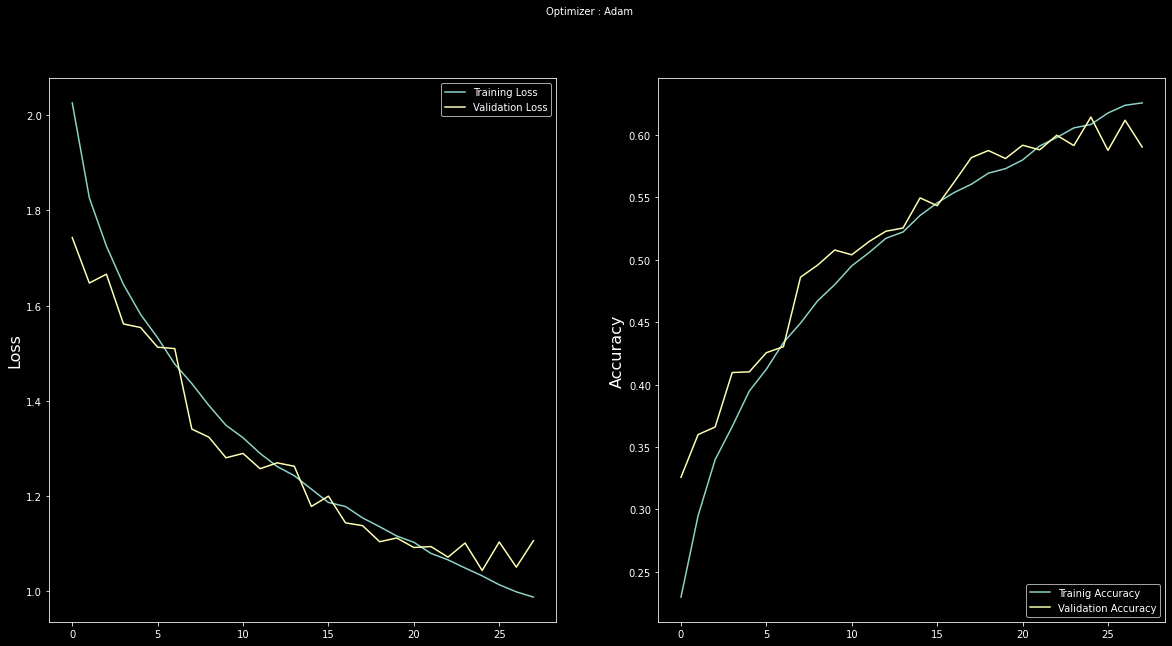

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer : Adam', fontsize = 10)
plt.ylabel('Loss',fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(history.history['accuracy'],label='Trainig Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model 

model.save('/content/drive/MyDrive/saved models/Emotion_model.h5')